# Welcome to Colab!

In [25]:
import numpy as np
import time
import matplotlib.pyplot as plt


In [15]:
def rosenbrock(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

def grad_rosenbrock(x):
    dx = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
    dy = 200*(x[1] - x[0]**2)
    return np.array([dx, dy])



In [16]:
def sin_inv_vec(x):
    if abs(x[0]) < 1e-6:
        return 0.0
    return np.sin(1/x[0])

def grad_sin_inv_vec(x):
    if abs(x[0]) < 1e-6:
        return np.array([0.0])
    return np.array([-np.cos(1/x[0])/(x[0]**2)])




In [17]:
def gradient_descent(grad, x0, lr, max_iter=5000, tol=1e-6):
    x = x0.copy()
    history = []
    start = time.time()

    for _ in range(max_iter):
        g = grad(x)
        if np.linalg.norm(g) > 1e8:
            break
        history.append(np.linalg.norm(g))
        if np.linalg.norm(g) < tol:
            break
        x -= lr * g

    return x, history, time.time() - start




In [18]:
def momentum_gd(grad, x0, lr, beta=0.9, max_iter=5000, tol=1e-6):
    x = x0.copy()
    v = np.zeros_like(x)
    history = []
    start = time.time()

    for _ in range(max_iter):
        g = grad(x)
        if np.linalg.norm(g) > 1e8:
            break
        v = beta*v + lr*g
        x -= v
        history.append(np.linalg.norm(g))
        if np.linalg.norm(g) < tol:
            break

    return x, history, time.time() - start




In [19]:
def adam(grad, x0, lr, beta1=0.9, beta2=0.999, eps=1e-8,
         max_iter=5000, tol=1e-6):
    x = x0.copy()
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    history = []
    start = time.time()

    for t in range(1, max_iter+1):
        g = grad(x)

        if np.linalg.norm(g) > 1e8:
            print("Adam diverged")
            break

        m = beta1*m + (1-beta1)*g
        v = beta2*v + (1-beta2)*(g**2)

        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        x -= lr * m_hat / (np.sqrt(v_hat) + eps)

        history.append(np.linalg.norm(g))

        if np.linalg.norm(g) < tol:
            break

    return x, history, time.time() - start



In [20]:
def rmsprop(grad, x0, lr, beta=0.9, eps=1e-8,
            max_iter=5000, tol=1e-6):
    x = x0.copy()
    s = np.zeros_like(x)
    history = []
    start = time.time()

    for _ in range(max_iter):
        g = grad(x)
        if np.linalg.norm(g) > 1e8:
            break
        s = beta*s + (1-beta)*(g**2)
        x -= lr*g/(np.sqrt(s)+eps)
        history.append(np.linalg.norm(g))
        if np.linalg.norm(g) < tol:
            break

    return x, history, time.time() - start




In [21]:
def adagrad(grad, x0, lr, eps=1e-8,
            max_iter=5000, tol=1e-6):
    x = x0.copy()
    G = np.zeros_like(x)
    history = []
    start = time.time()

    for _ in range(max_iter):
        g = grad(x)
        if np.linalg.norm(g) > 1e8:
            break
        G += g**2
        x -= lr*g/(np.sqrt(G)+eps)
        history.append(np.linalg.norm(g))
        if np.linalg.norm(g) < tol:
            break

    return x, history, time.time() - start




In [28]:
def adam(grad, x0, lr, beta1=0.9, beta2=0.999, eps=1e-8,
         max_iter=5000, tol=1e-6):
    x = x0.copy()
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    history = []
    start = time.time()

    for t in range(1, max_iter+1):
        g = grad(x)

        if np.linalg.norm(g) > 1e8:
            print("Adam diverged")
            break

        m = beta1*m + (1-beta1)*g
        v = beta2*v + (1-beta2)*(g**2)

        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        x -= lr * m_hat / (np.sqrt(v_hat) + eps)

        history.append(np.linalg.norm(g))

        if np.linalg.norm(g) < tol:
            break

    return x, history, time.time() - start



In [29]:
lrs = [0.01, 0.05, 0.1]

optimizers = {
    "GD": gradient_descent,
    "Momentum": momentum_gd,
    "Adam": adam,
    "RMSprop": rmsprop,
    "Adagrad": adagrad
}



In [30]:
x0_rosen = np.array([-1.5, 1.5])
results_rosen = {}

for lr in lrs:
    for name, opt in optimizers.items():
        x_opt, hist, t = opt(grad_rosenbrock, x0_rosen, lr)
        results_rosen[(name, lr)] = (x_opt, rosenbrock(x_opt), hist, t)


In [31]:
x0_sin = np.array([0.5])
results_sin = {}

for lr in lrs:
    for name, opt in optimizers.items():
        x_opt, hist, t = opt(grad_sin_inv_vec, x0_sin, lr)
        results_sin[(name, lr)] = (x_opt[0], sin_inv_vec(x_opt), hist, t)


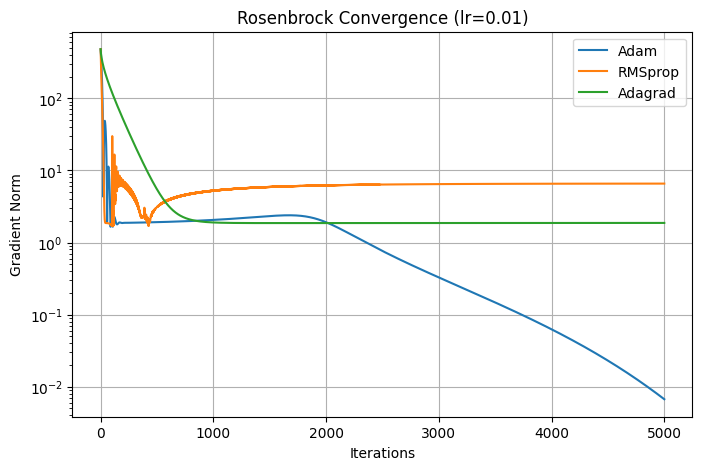

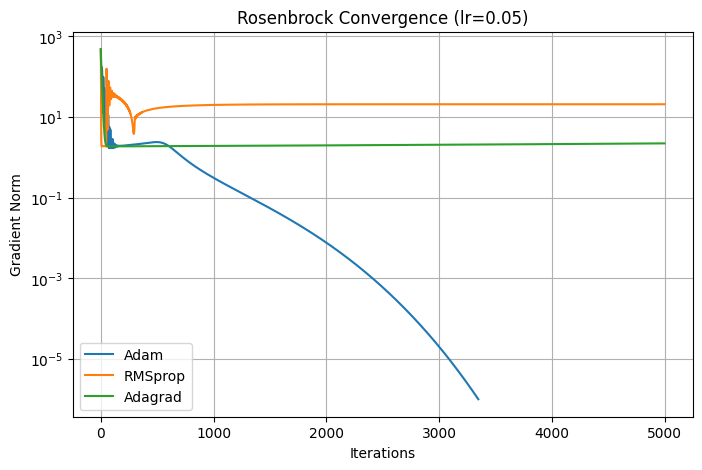

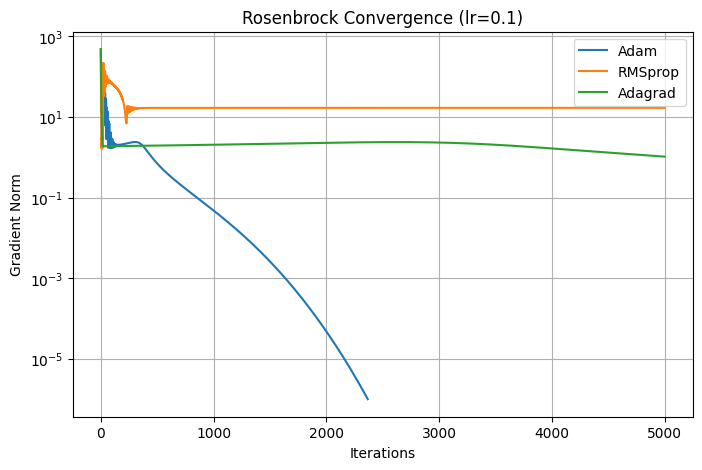

In [32]:
def plot_rosenbrock(results, lrs, optimizer_names):
    for lr in lrs:
        plt.figure(figsize=(8,5))
        for name in optimizer_names:
            _, _, hist, _ = results[(name, lr)]
            if len(hist) < 5:
                continue
            plt.plot(hist, label=name)
        plt.yscale("log")
        plt.xlabel("Iterations")
        plt.ylabel("Gradient Norm")
        plt.title(f"Rosenbrock Convergence (lr={lr})")
        plt.legend()
        plt.grid(True)
        plt.show()

optimizer_names = list(optimizers.keys())
plot_rosenbrock(results_rosen, lrs, optimizer_names)


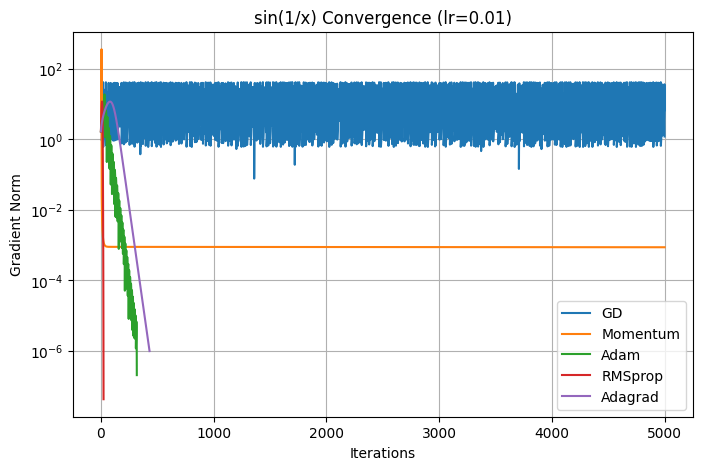

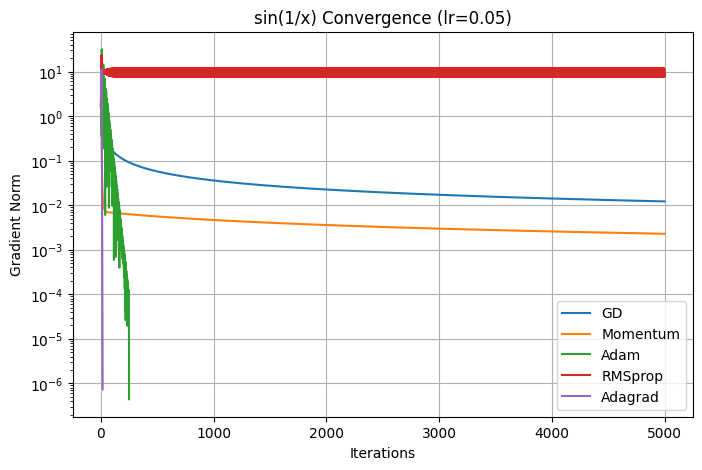

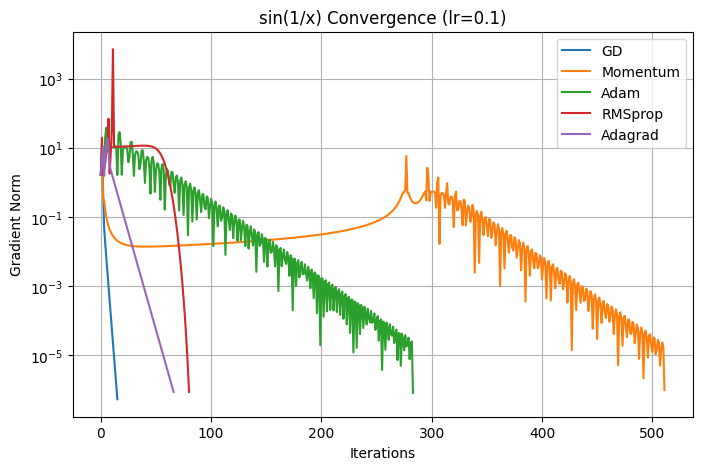

In [33]:
def plot_sin(results, lrs, optimizer_names):
    for lr in lrs:
        plt.figure(figsize=(8,5))
        for name in optimizer_names:
            _, _, hist, _ = results[(name, lr)]
            if len(hist) < 5:
                continue
            plt.plot(hist, label=name)
        plt.yscale("log")
        plt.xlabel("Iterations")
        plt.ylabel("Gradient Norm")
        plt.title(f"sin(1/x) Convergence (lr={lr})")
        plt.legend()
        plt.grid(True)
        plt.show()

plot_sin(results_sin, lrs, optimizer_names)
